In [58]:
################################################################################
#  SIMPLE TUNDISH MIXING MODEL OF CONTINUOUS CASTING DURING A GRADE TRANSITION
#           Myung Jing CHO and In Cheol KIM, ISIJ, 2006, n. 10
#
# Rev. 01
################################################################################

class bcolors:
    HEADER    = '\033[95m'
    OKBLUE    = '\033[94m'
    OKGREEN   = '\033[92m'
    WARNING   = '\033[93m'
    FAIL      = '\033[91m'
    ENDC      = '\033[0m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'

################################################################################
#                         OBTAIN THE STARTING VALUES
# Step 0:
################################################################################

# time [s]
t = []        # define t as a list (list comprehension)
              # https://docs.python.org/3.6/tutorial/datastructures.html
t.append(0)   # insert the initial value (time zero)
# time increment [s]
dt = 1
# print info
def info_time():
    print(bcolors.BOLD + bcolors.FAIL +
          "*** TIME INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "current simulation time (t): %.1f [s] - %.1f [min],\
time increment (dt): %.1f [s]\nnumber of time steps: %d" % 
          (t[-1], t[-1]/60, dt, len(t)) + 
         bcolors.ENDC)
    
# mass of the tundish (max_value) [kg]
M_td_max = 30 * 1000
# mass of the tundish (min_value reached during the change of ladle) [kg]
M_td_min = 22 * 1000
# mass of the tundish (initial value) [kg]
M_td = 30 * 1000
tundish_mass = []   # list used to plot the results
tundish_mass.append(M_td)
# print info
def info_tundish():
    print(bcolors.BOLD + bcolors.FAIL +
          "*** TUNDISH INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "M_td: %.1f [kg], M_td_max: %.1f [kg], M_td_min: %.1f [kg]" % 
          (M_td, M_td_max, M_td_min) + 
          bcolors.ENDC)

# casting speed [m/min]
c_speed = 0.45
# casting speed [m/s]
cast_speed = c_speed / 60
# section diameter [m]
diam = 405 / 1000 
# number of strands
n_strands = 4
# print info
def info_caster():
    print(bcolors.BOLD + bcolors.FAIL +
          "*** CASTER INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "cast speed: %.2f [m/min], cast_speed: %.5f [m/s],\
section diameter: %.3f [m], number of strands: %d" % 
          (c_speed, cast_speed, diam, n_strands) + 
          bcolors.ENDC)

# in-flow mass flow rate [m3/s]
Q_in = 0   #initial condition: slide gate is closed
# out-flow mass flow rate for a single strand [m3/s/strand]
import math
Q_out_j = math.pi * (diam / 2)**2 * cast_speed
# out-flow mass [m3/s]
Q_out = Q_out_j * n_strands
# print info
def info_flow_rate():
     print(bcolors.BOLD + bcolors.FAIL +
          "*** FLOW RATE INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "Q_in: %.6f [m3/s], Q_out_j: %.6f [m3/s/strand], Q_out: %.6f [m3/s]" % 
          (Q_in, Q_out_j, Q_out) + 
          bcolors.ENDC)

# density of steel entering from the inlet [kg/m3]
rho_in = 7750 
# density of steel coming out of the exit [kg/m3]
rho_out = 7650 
steel_density_out = []
steel_density_out.append(rho_out)
# print info
def info_density():
     print(bcolors.BOLD + bcolors.FAIL +
          "*** DENSITY INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "rho_in: %.1f, rho_out: %.1f" % 
          (rho_in, rho_out) + 
          bcolors.ENDC)

# inlet concentration 
C_in = 1
# outlet concentration
C_out = 0
concentration_out = []  # list used to plot the results
concentration_out.append(C_out)
# average concentration (initial value)
C_ave = 0
concentration_ave = []  # list used to plot the results
concentration_ave.append(C_ave)
#print info
def info_concentration():
     print(bcolors.BOLD + bcolors.FAIL +
          "*** CONCENTRATION INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "C_in: %.1f, C_out: %.1f, C_ave: %.1f" % 
          (C_in, C_out, C_ave) + 
          bcolors.ENDC)

# optimized scale factor
f_opt = 1.
#print info
def info_f():
     print(bcolors.BOLD + bcolors.FAIL +
          "*** F INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "f: %.1f" % 
          (f_opt) + 
          bcolors.ENDC)
        
################################################################################
#                     DEFINITION OF THE FUNCTIONS
################################################################################
def M_td_fun(dt, M_td, rho_in, rho_out, Q_in, Q_out):
    M_td = M_td + (rho_in * Q_in * dt) - (Q_out * rho_out * dt)
    tundish_mass.append(M_td)
    return M_td

def rho_out_fun(C_out, rho_in, rho_out):
    rho_out = C_out * rho_in + (1 - C_out) * rho_out
    steel_density_out.append(rho_out)
    return rho_out

def C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_in, rho_out):
    C_ave = (M_td * C_ave + Q_in * rho_in * dt * C_in) / M_td - \
            (Q_out * rho_out * dt * C_out) / M_td
    concentration_ave.append(C_ave)
    return C_ave

def C_out_fun(f_opt, C_ave, C_in, C_out):
    C_out = f_opt * C_ave + (1 - f_opt) * C_in
    concentration_out.append(C_out)
    return C_out

################################################################################
#                        START CONDITIONS PRINT
################################################################################
info_f()
info_caster()
info_flow_rate()
info_density()
info_time()
info_tundish()
info_concentration()

################################################################################
#               TUNDISH EMPTYING DURING LADLE CHANGE
################################################################################
print(bcolors.BOLD + bcolors.WARNING + "\n Emptying the tundish,\
\nQ_in: %.6f [m3/s], Q_out: %.6f [m3/s]\n" % (Q_in, Q_out) + bcolors.ENDC)

#for x in range (n_time_step):
while ( M_td > M_td_min ):
    # Step 2:
    M_td = M_td_fun(dt, M_td, rho_in, rho_out, Q_in, Q_out)
    rho_out = rho_out_fun(C_out, rho_in, rho_out)
    # Step 3:
    C_ave = C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_in, rho_out)
    # Step 4:
    C_out = C_out_fun(f_opt, C_ave, C_in, C_out)
    # Step 5:
    t.append(t[-1] + dt)  

tundish_emptying_time = t[-1]
info_time()
info_tundish()
info_concentration()
print("\n Tundish emptying time: %.1f [s] = %.1f [min] "
      % (tundish_emptying_time, tundish_emptying_time/60))

################################################################################
#               TUNDISH FILLING AFTER LADLE CHANGE
################################################################################
# in-flow mass flow rate [m3/s]
Q_in = 0.019108 # filling flow rate

print(bcolors.BOLD + bcolors.WARNING + "\n Filling the tundish to the max tundish weigth,\
\nQ_in: %.6f [m3/s], Q_out: %.6f [m3/s]\n" % (Q_in, Q_out) + bcolors.ENDC)

while ( M_td < M_td_max ):
    # Step 2:
    M_td = M_td_fun(dt, M_td, rho_in, rho_out, Q_in, Q_out)
    rho_out = rho_out_fun(C_out, rho_in, rho_out)
    # Step 3:
    C_ave = C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_in, rho_out)
    # Step 4:
    C_out = C_out_fun(f_opt, C_ave, C_in, C_out)
    # Step 5:
    t.append(t[-1] + dt)  
    
tundish_filling_time = t[-1] - tundish_emptying_time
info_time()
info_tundish()
info_concentration()
print("\n Tundish filling time: %.1f [s] = %.1f [min] \n"
      % (tundish_filling_time, tundish_filling_time/60))

################################################################################
#               MEET THE FINAL CONCENTRATION 0.7
################################################################################
# in-flow mass flow rate [m3/s]
Q_in = Q_out # steady state
# target concentration value to meet
C_target = 0.7

print(bcolors.BOLD + bcolors.WARNING + "\n Meet the C_target concentation of %.1f,\
\nQ_in: %.6f [m3/s], Q_out: %.6f [m3/s]\n" % (C_target, Q_in, Q_out) + bcolors.ENDC)

while ( C_out < C_target ):
    # Step 2:
    M_td = M_td_fun(dt, M_td, rho_in, rho_out, Q_in, Q_out)
    rho_out = rho_out_fun(C_out, rho_in, rho_out)
    # Step 3:
    C_ave = C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_in, rho_out)
    # Step 4:
    C_out = C_out_fun(f_opt, C_ave, C_in, C_out)
    # Step 5:
    t.append(t[-1] + dt)  
    
time_to_reach_the_final_conc_1 = t[-1] - tundish_filling_time - tundish_emptying_time
info_time()
info_tundish()
info_concentration()
print("\n time to reach the final concentration of %.1f : %.1f [s] = %.1f [min] \n" 
      % (C_target, time_to_reach_the_final_conc_1, time_to_reach_the_final_conc_1/60))

################################################################################
#               MEET THE FINAL CONCENTRATION 0.9
################################################################################
# in-flow mass flow rate [m3/s]
Q_in = Q_out # steady state
# target concentration value to meet
C_target = 0.9

print(bcolors.BOLD + bcolors.WARNING + "\n Meet the C_target concentation of %.1f,\
\nQ_in: %.6f [m3/s], Q_out: %.6f [m3/s]\n" % (C_target, Q_in, Q_out) + bcolors.ENDC)

while ( C_out < C_target ):
    # Step 2:
    M_td = M_td_fun(dt, M_td, rho_in, rho_out, Q_in, Q_out)
    rho_out = rho_out_fun(C_out, rho_in, rho_out)
    # Step 3:
    C_ave = C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_in, rho_out)
    # Step 4:
    C_out = C_out_fun(f_opt, C_ave, C_in, C_out)
    # Step 5:
    t.append(t[-1] + dt)  
    
time_to_reach_the_final_conc_2 = t[-1] - tundish_filling_time - tundish_emptying_time - \
                                     time_to_reach_the_final_conc_1
info_time()
info_tundish()
info_concentration()
print("\n time to reach the final concentration of %.1f : %.1f [s] = %.1f [min] \n" 
      % (C_target, time_to_reach_the_final_conc_2, time_to_reach_the_final_conc_2/60))


*** F INFO ***
f: 1.0
*** CASTER INFO ***
cast speed: 0.45 [m/min], cast_speed: 0.00750 [m/s],section diameter: 0.405 [m], number of strands: 4
*** FLOW RATE INFO ***
Q_in: 0.000000 [m3/s], Q_out_j: 0.000966 [m3/s/strand], Q_out: 0.003865 [m3/s]
*** DENSITY INFO ***
rho_in: 7750.0, rho_out: 7650.0
*** TIME INFO ***
current simulation time (t): 0.0 [s] - 0.0 [min],time increment (dt): 1.0 [s]
number of time steps: 1
*** TUNDISH INFO ***
M_td: 30000.0 [kg], M_td_max: 30000.0 [kg], M_td_min: 22000.0 [kg]
*** CONCENTRATION INFO ***
C_in: 1.0, C_out: 0.0, C_ave: 0.0

 Emptying the tundish,
Q_in: 0.000000 [m3/s], Q_out: 0.003865 [m3/s]

*** TIME INFO ***
current simulation time (t): 271.0 [s] - 4.5 [min],time increment (dt): 1.0 [s]
number of time steps: 272
*** TUNDISH INFO ***
M_td: 21987.8 [kg], M_td_max: 30000.0 [kg], M_td_min: 22000.0 [kg]
*** CONCENTRATION INFO ***
C_in: 1.0, C_out: 0.0, C_ave: 0.0

 Tundish emptying time: 271.0 [s] = 4.5 [min] 

 Filling the tundish to the max tundish

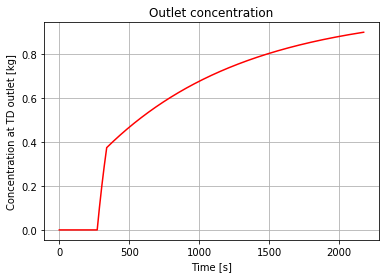

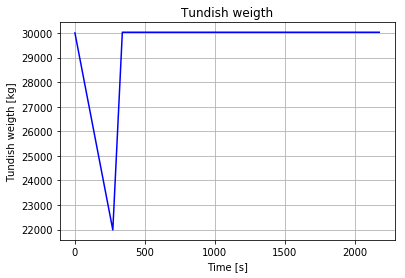

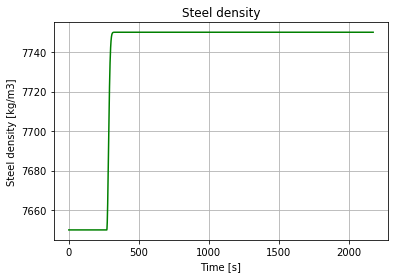

In [59]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.title('Outlet concentration')
plt.plot(t, concentration_out , 'r')
plt.ylabel('Concentration at TD outlet [kg]')
plt.xlabel('Time [s]')
# plt.axis([0, 3000, 0, 1])
plt.grid()
plt.show()

plt.figure(2)
plt.title('Tundish weigth')
plt.plot(t, tundish_mass , 'b')
plt.ylabel('Tundish weigth [kg]')
plt.xlabel('Time [s]')
# plt.axis([0, 3000, 5000, 35000])
plt.grid()
plt.show()

plt.figure(3)
plt.title('Steel density')
plt.plot(t, steel_density_out , 'g')
plt.ylabel('Steel density [kg/m3]')
plt.xlabel('Time [s]')
# plt.axis([0, 3000, 7600, 7800])
plt.grid()
plt.show()